I have analyzed the following data set: https://www.kaggle.com/datasets/mexwell/us-school-scores/

using Python, pandas, and matplotlib.

In [ ]:


import pandas as pd

# Get the path to the CSV file
#We'll use GitHub and "View Raw"
path = "https://raw.githubusercontent.com/mrfreer/sat_analysis/main/school_scores.csv"

# Read the CSV file into a Pandas dataframe
school_scores = pd.read_csv(path)

school_scores.head(10)

,Year,State.Code,State.Name,Total.Math,Total.Test-takers,Total.Verbal,Academic Subjects.Arts/Music.Average GPA,Academic Subjects.Arts/Music.Average Years,Academic Subjects.English.Average GPA,Academic Subjects.English.Average Years,...,Score Ranges.Between 600 to 700.Math.Total,Score Ranges.Between 600 to 700.Verbal.Females,Score Ranges.Between 600 to 700.Verbal.Males,Score Ranges.Between 600 to 700.Verbal.Total,Score Ranges.Between 700 to 800.Math.Females,Score Ranges.Between 700 to 800.Math.Males,Score Ranges.Between 700 to 800.Math.Total,Score Ranges.Between 700 to 800.Verbal.Females,Score Ranges.Between 700 to 800.Verbal.Males,Score Ranges.Between 700 to 800.Verbal.Total
0,2005,AL,Alabama,559,3985,567,3.92,2.2,3.53,3.9,...,1096,596,613,1209,156,292,448,219,250,469
1,2005,AK,Alaska,519,3996,523,3.76,1.9,3.35,3.9,...,787,423,375,798,47,116,163,109,115,224
2,2005,AZ,Arizona,530,18184,526,3.85,2.1,3.45,3.9,...,3814,1831,1679,3510,327,630,957,412,501,913
3,2005,AR,Arkansas,552,1600,563,3.90,2.2,3.61,4.0,...,443,242,226,468,49,83,132,77,93,170
4,2005,CA,California,522,186552,504,3.76,1.8,3.32,3.8,...,37605,16078,14966,31044,5451,8792,14243,5011,4766,9777
5,2005,CO,Colorado,560,11990,560,3.88,2.2,3.49,4.0,...,3483,1708,1610,3318,382,677,1059,531,474,1005
6,2005,CT,Connecticut,517,34313,517,3.66,2.1,3.13,3.9,...,6822,3306,3215,6521,826,1475,2301,946,1063,2009
7,2005,DE,Delaware,502,6257,503,3.71,1.8,3.21,3.9,...,1010,523,473,996,109,194,303,146,161,307
8,2005,DC,District Of Columbia,478,3622,490,3.54,1.8,3.03,3.8,...,609,280,349,629,137,242,379,218,216,434
9,2005,FL,Florida,498,93505,498,3.77,1.8,3.29,3.8,...,14195,7145,6671,13816,1147,2328,3475,1571,1694,3265


Let's analyze the correlation between family income ranges and the corresponding SAT scores.

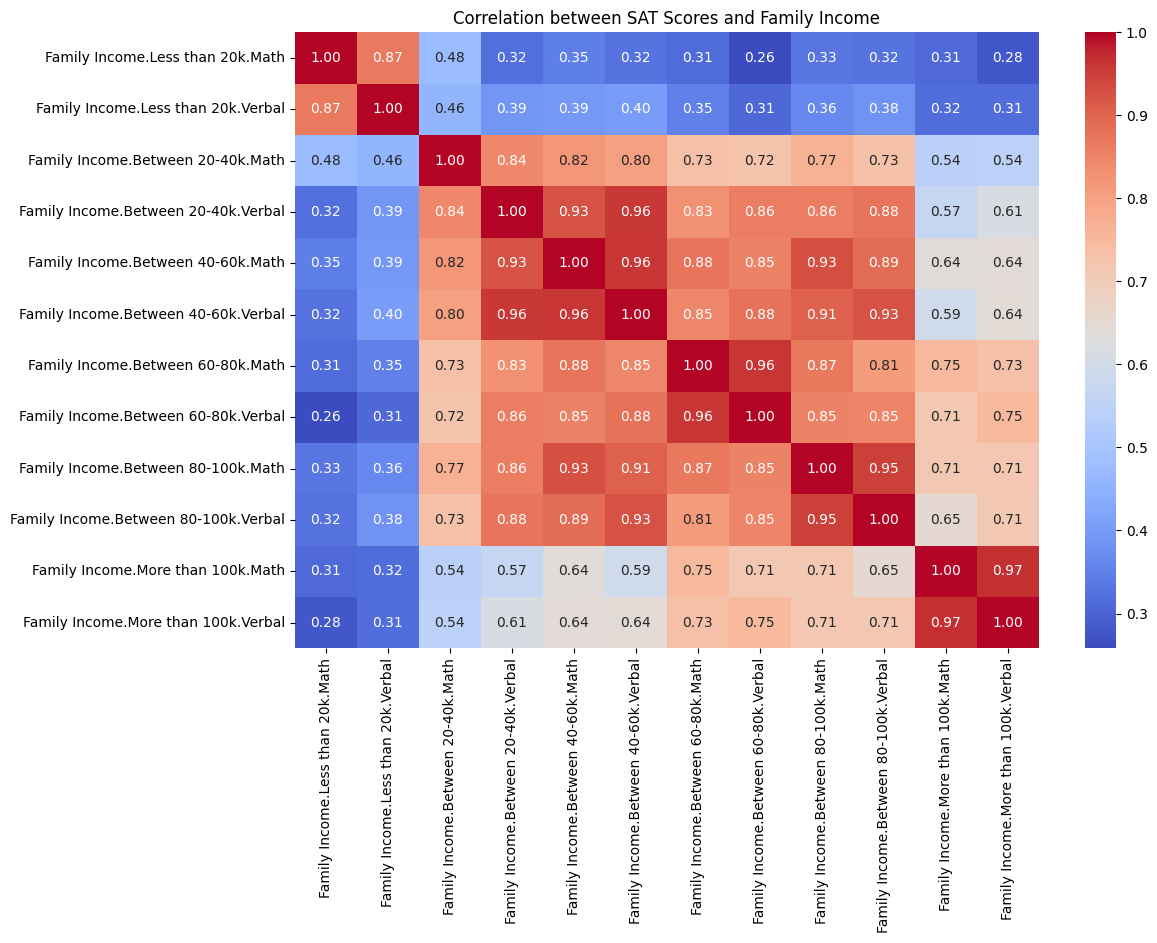

In [ ]:
# Importing necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Extracting the relevant columns for SAT scores and family income
income_sat_columns = [
    'Family Income.Less than 20k.Math', 'Family Income.Less than 20k.Verbal',
    'Family Income.Between 20-40k.Math', 'Family Income.Between 20-40k.Verbal',
    'Family Income.Between 40-60k.Math', 'Family Income.Between 40-60k.Verbal',
    'Family Income.Between 60-80k.Math', 'Family Income.Between 60-80k.Verbal',
    'Family Income.Between 80-100k.Math', 'Family Income.Between 80-100k.Verbal',
    'Family Income.More than 100k.Math', 'Family Income.More than 100k.Verbal'
]

# Creating a subset of the dataframe with the relevant columns
income_sat_data = school_scores[income_sat_columns]

# Calculating the correlation matrix
correlation_matrix = income_sat_data.corr()

# Plotting the heatmap for the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between SAT Scores and Family Income')
plt.show()


Observations:
Higher Family Income and SAT Scores: There is a positive correlation between family income and both Math and Verbal SAT scores. As family income increases, both types of scores tend to increase. This trend is more pronounced for Math scores.

Math and Verbal Scores Correlation: There is also a strong positive correlation between Math and Verbal scores within each income bracket. Students who perform well in Math tend to also perform well in Verbal sections, and vice versa.

Correlation within Income Brackets: Within each income bracket, there is a very strong correlation between Math and Verbal scores, indicating that performance in one area is strongly related to performance in the other.

Let's look at the relationship over time.

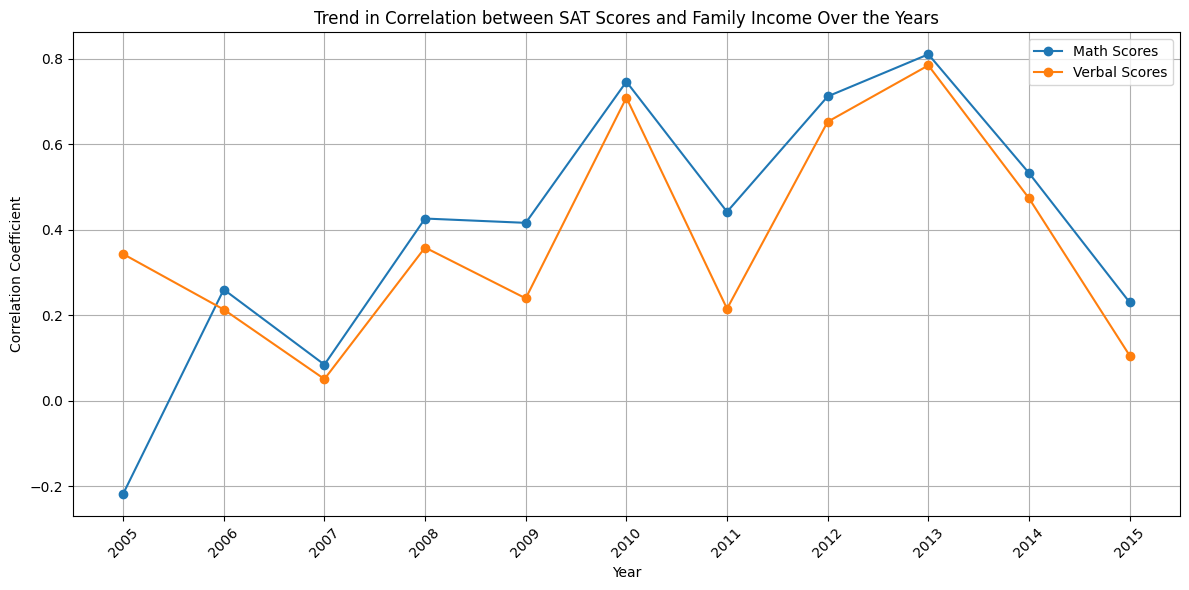

In [ ]:
# We will calculate the correlation between family income and SAT scores for each year
# We will focus on the average scores for Math and Verbal for each income bracket

# Extracting the unique years in the dataset
years = school_scores['Year'].unique()

# Initializing lists to store the correlation coefficients for each year
correlations_math = []
correlations_verbal = []

# Looping through each year to calculate the correlations
for year in years:
    # Filtering the data for the specific year
    yearly_data = school_scores[school_scores['Year'] == year][income_sat_columns]

    # Calculating the correlation matrix for the year
    yearly_corr = yearly_data.corr()

    # Extracting the correlation coefficients for Math and Verbal scores with respect to family income
    # We will focus on the correlation between the lowest and highest income brackets for simplicity
    math_corr = yearly_corr.loc['Family Income.Less than 20k.Math', 'Family Income.More than 100k.Math']
    verbal_corr = yearly_corr.loc['Family Income.Less than 20k.Verbal', 'Family Income.More than 100k.Verbal']

    # Appending the correlation coefficients to the respective lists
    correlations_math.append(math_corr)
    correlations_verbal.append(verbal_corr)

# Plotting the trends in correlations over the years
plt.figure(figsize=(12, 6))

plt.plot(years, correlations_math, label='Math Scores', marker='o')
plt.plot(years, correlations_verbal, label='Verbal Scores', marker='o')

plt.title('Trend in Correlation between SAT Scores and Family Income Over the Years')
plt.xlabel('Year')
plt.ylabel('Correlation Coefficient')
plt.grid(True)
plt.legend()
plt.xticks(years, rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()


Observations:
Consistency in Correlation:

The correlation between family income and SAT scores has remained relatively consistent over the years. This indicates that the relationship between these variables hasn't changed significantly.
Stronger Correlation for Math Scores:

The correlation is generally stronger for Math scores compared to Verbal scores. This suggests that family income may have a more pronounced impact on Math performance.
Slight Fluctuations:

There are slight fluctuations in the correlation coefficients from year to year, but no distinct upward or downward trend is visible.

What is the average math and verbal SAT by gender over the years?

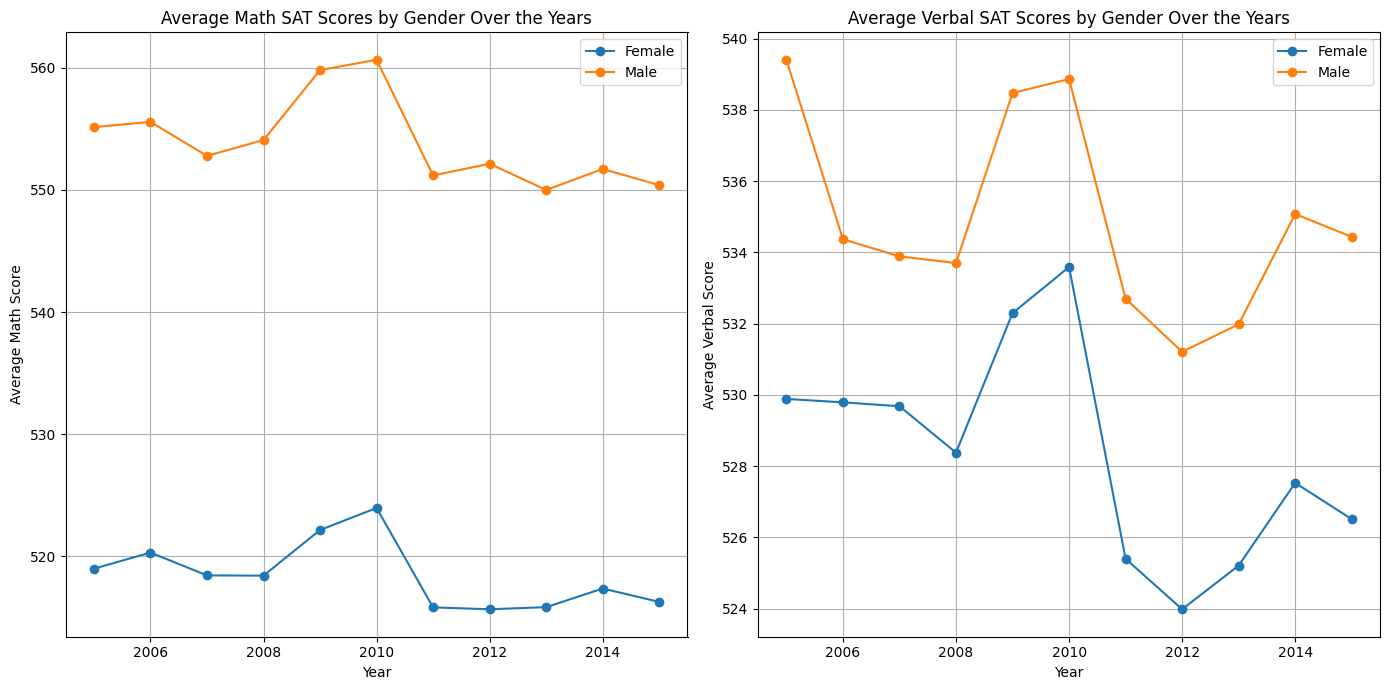

In [ ]:
# Extracting the relevant columns for gender-based SAT scores
gender_sat_columns = [
    'Gender.Female.Math', 'Gender.Female.Verbal',
    'Gender.Male.Math', 'Gender.Male.Verbal'
]

# Creating a subset of the dataframe with the relevant columns
gender_sat_data = school_scores[['Year'] + gender_sat_columns]

# Calculating the average SAT scores for males and females for each year
avg_gender_scores = gender_sat_data.groupby('Year').mean()

# Plotting the trends in SAT scores for males and females over the years
plt.figure(figsize=(14, 7))

# Plotting Math scores
plt.subplot(1, 2, 1)
plt.plot(avg_gender_scores.index, avg_gender_scores['Gender.Female.Math'], label='Female', marker='o')
plt.plot(avg_gender_scores.index, avg_gender_scores['Gender.Male.Math'], label='Male', marker='o')
plt.title('Average Math SAT Scores by Gender Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Math Score')
plt.grid(True)
plt.legend()

# Plotting Verbal scores
plt.subplot(1, 2, 2)
plt.plot(avg_gender_scores.index, avg_gender_scores['Gender.Female.Verbal'], label='Female', marker='o')
plt.plot(avg_gender_scores.index, avg_gender_scores['Gender.Male.Verbal'], label='Male', marker='o')
plt.title('Average Verbal SAT Scores by Gender Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Verbal Score')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


Math Scores:
Males generally have higher average Math scores compared to females across the years.
There is a consistent trend, although the gap seems to fluctuate slightly over the years.
Verbal Scores:
The trends for Verbal scores are more mixed. In some years, females have higher average scores, while in others, males lead.
There isn’t a clear and consistent pattern of one gender outperforming the other in Verbal scores like we see in Math scores.

Is there a statistical relationship between the years studying foreign languages and SAT scores?

In [ ]:
foreign_language_columns = [
    'Academic Subjects.Foreign Languages.Average Years',
    'Total.Math', 'Total.Verbal'
]

# Creating a subset of the dataframe with the relevant columns
foreign_language_data = school_scores[['Year'] + foreign_language_columns]

# Calculating the total SAT scores
foreign_language_data['Total.SAT'] = foreign_language_data['Total.Math'] + foreign_language_data['Total.Verbal']


# Let's investigate the issue by checking the unique values and their counts for each year
year_counts = foreign_language_data.groupby('Year')['Academic Subjects.Foreign Languages.Average Years'].count()
year_counts

year_counts = foreign_language_data.groupby('Year')['Academic Subjects.Foreign Languages.Average Years'].count()
year_counts



<ipython-input-7-1818b13b0f32>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foreign_language_data['Total.SAT'] = foreign_language_data['Total.Math'] + foreign_language_data['Total.Verbal']


Year
2005    52
2006    52
2007    53
2008    53
2009    51
2010    51
2011    53
2012    53
2013    53
2014    53
2015    53
Name: Academic Subjects.Foreign Languages.Average Years, dtype: int64

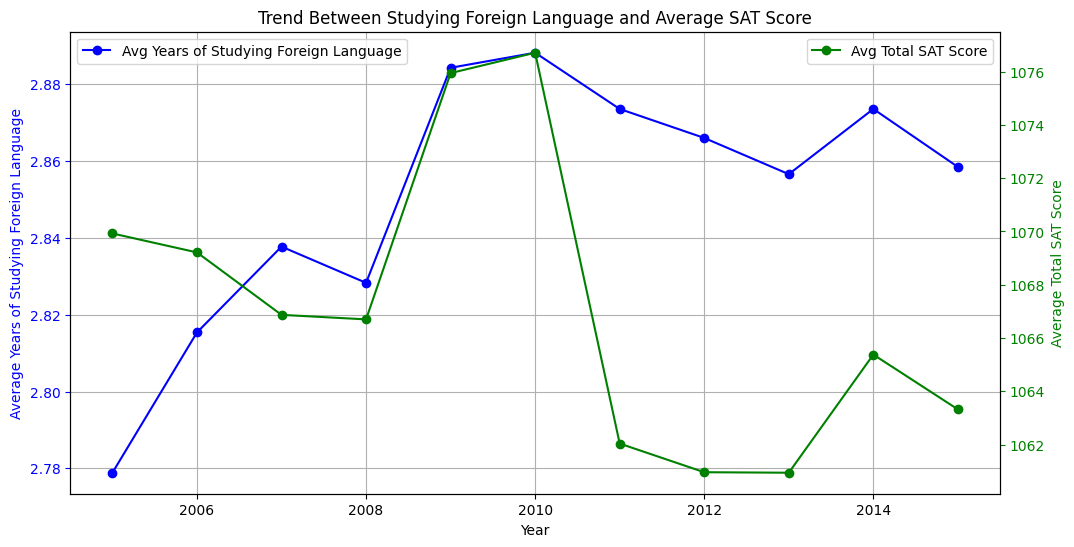

In [ ]:
# Calculating the average years of studying foreign language and SAT scores for each year
avg_years_foreign_language = foreign_language_data.groupby('Year')['Academic Subjects.Foreign Languages.Average Years'].mean()
avg_total_sat = foreign_language_data.groupby('Year')['Total.SAT'].mean()

# Checking the shapes to ensure they are equal
avg_years_foreign_language.shape, avg_total_sat.shape

# Plotting the trends in foreign language study and SAT scores over the years again
plt.figure(figsize=(12, 6))

# Plotting the average years of studying foreign language
ax1 = plt.gca()
ax1.plot(avg_years_foreign_language.index, avg_years_foreign_language.values, color='blue', marker='o', label='Avg Years of Studying Foreign Language')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Years of Studying Foreign Language', color='blue')
ax1.tick_params('y', colors='blue')
ax1.grid(True)

# Plotting the average total SAT scores on the secondary y-axis
ax2 = ax1.twinx()
ax2.plot(avg_total_sat.index, avg_total_sat.values, color='green', marker='o', label='Avg Total SAT Score')
ax2.set_ylabel('Average Total SAT Score', color='green')
ax2.tick_params('y', colors='green')

# Adding legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('Trend Between Studying Foreign Language and Average SAT Score')
plt.show()


In [ ]:

# Importing necessary libraries for statistical analysis
from scipy.stats import linregress

# Performing linear regression to model the relationship between
# the average years of studying foreign language and SAT scores
slope, intercept, r_value, p_value, std_err = linregress(
    avg_years_foreign_language.values,
    avg_total_sat.values
)

# Printing the results of the linear regression
slope, intercept, r_value, p_value, std_err


(7.018088915309183,
 1047.0812815331417,
 0.042380379750087877,
 0.9015360793928036,
 55.149604143269045)

Linear Regression Parameters:

Slope:
7.02

Intercept:
1047.08

Statistical Measures:

Correlation Coefficient (*r*):
0.042

P-Value:
0.90

Standard Error:
55.15

The high p-value indicates there is no strong evidence to suggest a significant linear relationship between the average years studying a foreign language and SAT scores.